In [1]:
import os
import pickle
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Union
import numpy as np
import pandas as pd
import scipy.optimize as sp
import math
import matplotlib.pyplot as plt

In [2]:
data_path = "../data/04_cricket_1999to2011.csv"

In [3]:
def get_data(data_path) -> Union[pd.DataFrame, np.ndarray]:
    """
    Loads the data from the given path and returns a pandas dataframe.

    Args:
        path (str): Path to the data file.

    Returns:
        pd.DataFrame, np.ndarray: Data Structure containing the loaded data
        
    """
    try:
        data = pd.read_csv(data_path)
        return data
    except FileNotFoundError:
        print(f"File not found at '{data_path}'. Please provide the correct path.")
        return None
    
    

In [4]:
data = get_data(data_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126768 entries, 0 to 126767
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Match                      126768 non-null  int64  
 1   Date                       126768 non-null  object 
 2   Innings                    126768 non-null  int64  
 3   Over                       126768 non-null  int64  
 4   Runs                       126768 non-null  int64  
 5   Total.Runs                 126768 non-null  int64  
 6   Innings.Total.Runs         126768 non-null  int64  
 7   Runs.Remaining             126768 non-null  int64  
 8   Total.Out                  126768 non-null  int64  
 9   Innings.Total.Out          126768 non-null  int64  
 10  Outs.Remaining             126768 non-null  int64  
 11  Wickets.in.Hand            126768 non-null  int64  
 12  Run.Rate                   126768 non-null  float64
 13  Innings.Run.Rate           12

In [5]:
print(f"Are there any Null Values in dataset? ---- {data.isnull().values.any()}")
print(f"Total null values in dataset? ---- {data.isnull().sum().sum()}")

Are there any Null Values in dataset? ---- True
Total null values in dataset? ---- 1109


In [6]:
column_names = list(data.columns.values)
column_names

['Match',
 'Date',
 'Innings',
 'Over',
 'Runs',
 'Total.Runs',
 'Innings.Total.Runs',
 'Runs.Remaining',
 'Total.Out',
 'Innings.Total.Out',
 'Outs.Remaining',
 'Wickets.in.Hand',
 'Run.Rate',
 'Innings.Run.Rate',
 'Run.Rate.Required',
 'Initial.Run.Rate.Required',
 'Target.Score',
 'Day-night',
 'At.Bat',
 'Fielding',
 'Home.Team',
 'Away.Team',
 'Stadium',
 'Country',
 'Total.Overs',
 'Winning.Team',
 'Toss.Winner',
 'at.bat.wins',
 'at.bat.won.toss',
 'at.bat.at.home',
 'at.bat.bat.first',
 'chose_bat_1st',
 'chose_bat_2nd',
 'forced_bat_1st',
 'forced_bat_2nd',
 'new.game',
 'Error.In.Data',
 'common.support']

In [7]:
data['Error.In.Data'].isnull().values.any()

False

In [8]:
def check_null_values(dataset):
    df = pd.DataFrame(dataset)
    null_info = {}

    for column in df.columns:
        null_count = df[column].isnull().sum()
        null_info[column] = null_count

    return null_info

import matplotlib.pyplot as plt

def dict_plot(null_info):
    mylist = [key for key, val in null_info.items() for _ in range(val)]
    plt.hist(mylist, bins=20)
    plt.show()


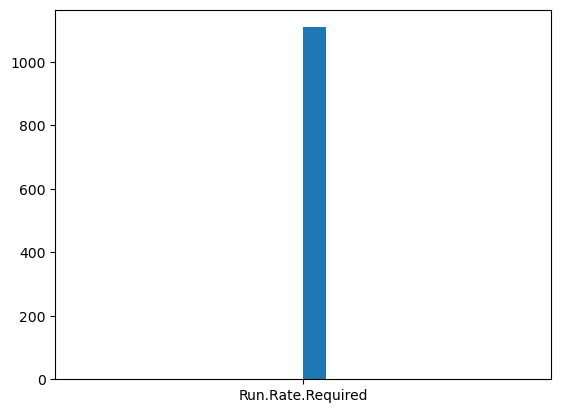

Only Required-Run-Rate has NaN Values


In [9]:
null_info = check_null_values(data)
dict_plot(null_info)
print(f"Only Required-Run-Rate has NaN Values")

In [10]:
#data = data.dropna()

In [11]:
def null_details(data: Union[pd.DataFrame, np.ndarray]):
    print(f"Are there any Null Values in dataset? ---- {data.isnull().values.any()}")
    print(f"Total null values in dataset? ---- {data.isnull().sum().sum()}")
    print(f"The size of our dataset is {len(data)}")
    print(f"The size of our dataset is {len(data.columns)}")

In [12]:
def null_details(data: Union[pd.DataFrame, np.ndarray]):
    print(f"Are there any Null Values in dataset? ---- {data.isnull().values.any()}")
    print(f"Total null values in dataset? ---- {data.isnull().sum().sum()}")
    print(f"The size of our dataset is {len(data)}")
    print(f"The size of our dataset is {len(data.columns)}")
    

def select_columns(data: Union[pd.DataFrame, np.ndarray], columns_to_keep):
    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data)

    data = data[columns_to_keep]

    return data

def preprocess_data(data: Union[pd.DataFrame, np.ndarray]) -> Union[pd.DataFrame, np.ndarray]:
    """Preprocesses the dataframe by
    (i)   removing the unnecessary columns,
    (ii)  loading date in proper format DD-MM-YYYY,
    (iii) removing the rows with missing values,
    (iv)  anything else you feel is required for training your model.

    Args:
        data (pd.DataFrame, nd.ndarray): Pandas dataframe containing the loaded data

    Returns:
        pd.DataFrame, np.ndarray: Datastructure containing the cleaned data.
    """
    columns_to_keep = ['Innings', 'Innings.Total.Runs', 'Total.Overs', 'Wickets.in.Hand', 'Over', 'Total.Runs']
    
    print("Details before Preprocessing")
    print("-"*40)
    null_details(data)
    data = data.dropna()
    data = select_columns(data, columns_to_keep)
    print("Details After Preprocessing")
    print("-"*40)

    null_details(data)
    
    return data

In [13]:
data = preprocess_data(data)

Details before Preprocessing
----------------------------------------
Are there any Null Values in dataset? ---- True
Total null values in dataset? ---- 1109
The size of our dataset is 126768
The size of our dataset is 38
Details After Preprocessing
----------------------------------------
Are there any Null Values in dataset? ---- False
Total null values in dataset? ---- 0
The size of our dataset is 125659
The size of our dataset is 6


In [14]:
data.head(5)

,Innings,Innings.Total.Runs,Total.Overs,Wickets.in.Hand,Over,Total.Runs
0,1,204,50,10,1,4
1,1,204,50,10,2,6
2,1,204,50,10,3,9
3,1,204,50,10,4,20
4,1,204,50,10,5,37


In [15]:
def fit_parameters(data):
    '''
    This procedure will fit the curve to optimise the overall loss function against 11 parameters.
    :param innings_number:
    :param runs_scored:
    :param remaining_overs:
    :param wickets_in_hand:
    :return:optimised_res['fun']:Total Loss incurred
    :return:optimised_res['x']:Optimised values of all 11 parameters.
    '''
    parameters = [10, 30, 40, 60, 90, 125, 150, 170, 190, 200,10]
    
    innings_number    = data['Innings'].values
    remaining_runs    = data['Innings.Total.Runs'].values - data['Total.Runs'].values
    remaining_overs   = data['Total.Overs'].values - data['Over'].values
    wickets_in_hand   = data['Wickets.in.Hand'].values
    
    optimised_res = sp.minimize(sum_of_squared_errors_loss_function,parameters,
                      args=[innings_number, remaining_runs, remaining_overs, wickets_in_hand],
                      method='L-BFGS-B')
    return optimised_res['fun'],optimised_res['x']

def sum_of_squared_errors_loss_function(parameters,args):
    '''
    This procedure defines the objective function which I have passed in scipy.optimize.minimize() function.
    It calculated all total squared error loss for all the data points for innings 1.
    :param parameters: List contains 11 parameters
    :param args: List contains innings_number,runs_scored,remaining_overs,wickets_in_hand
    :return:total_squared_error of the objective function.
    '''
    total_squared_error=0
    l_param=parameters[10]
    innings_number = args[0]
    runs_scored=args[1]
    remaining_overs=args[2]
    wickets_in_hand=args[3]
    for i in range(len(wickets_in_hand)):
        if innings_number[i] == 1:
            runscored = runs_scored[i]
            overremain = remaining_overs[i]
            wicketinhand = wickets_in_hand[i]
            Z0=parameters[wicketinhand - 1]
            if runscored > 0:
                predicted_run =  Z0 * (1 - np.exp(-1*l_param * overremain / Z0))
                total_squared_error=total_squared_error + (math.pow(predicted_run - runscored, 2))
    return total_squared_error

In [16]:
totalloss,optparameters=fit_parameters(data)

In [18]:
print("TOTAL LOSS ",totalloss)

TOTAL LOSS  104818209.15374437


In [19]:
for i in range(len(optparameters)):
        if(i == 10):
            print("L :"+str(optparameters[i]))
        else:
            print("Z["+str(i+1)+"] :"+str(optparameters[i]))

Z[1] :13.365236182163391
Z[2] :27.355680097138247
Z[3] :51.20220737004986
Z[4] :78.87005447218938
Z[5] :104.06181608139313
Z[6] :137.76972271090196
Z[7] :168.84279716370418
Z[8] :207.51379646861025
Z[9] :239.0619970895777
Z[10] :284.1304011896309
L :10.88844399469004


In [20]:
def plotparam_expectedrunvsoverremains(optparameters):
    '''
    This Procedure will plot the graph of ExpectedRun vs OverRemaining for all parameters.
    :param optparameters:
    This procedure will save the plot in source directory as "parameterplot_expectedrun_vs_overremain.png"
    '''
    plt.figure(1)
    plt.title("Expected Runs vs Overs Remaininng")
    plt.xlim((0, 50))
    plt.ylim((0, 250))
    plt.xticks([0, 10, 20, 30, 40, 50])
    plt.yticks([0, 50, 100, 150, 200, 250])
    plt.xlabel('Overs remaining')
    plt.ylabel('Expected Runs')
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', '#555b65', '#999e45', '#222a55']
    x=np.zeros((51))
    for i in range(51):
        x[i]=i
    for i in range(len(optparameters)-1):
        y_run=optparameters[i] * (1 - np.exp(-optparameters[10] * x /optparameters[i]))
        plt.plot(x, y_run, c=colors[i], label='Z[' + str(i + 1) + ']')
        plt.legend()
    #plt.savefig('parameterplot_expectedrun_vs_overremain.png')
    plt.show()
    #plt.close()

In [21]:
def plotparam_resourceremainvsoverremains(optparameters):
    '''
        This Procedure will plot the graph of ResourceRemainings vs OverRemaining for all parameters.
        :param optparameters:
        This procedure will save the plot in source directory as "parameterplot_resourceremain_vs_overremain.png"
        '''
    plt.figure(1)
    plt.title("Resource Remaining vs Overs Remaininng")
    plt.xlim((0, 50))
    plt.ylim((0, 100))
    plt.xticks([0, 10, 20, 30, 40, 50])
    plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
    plt.xlabel('Overs remaining')
    plt.ylabel('percentage Of Resource Remaining')
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', '#555b65', '#999e45', '#222a55']
    x = np.zeros((51))
    for i in range(51):
        x[i] = i
    Z5010=optparameters[9] * (1 - np.exp(-optparameters[10] * 50 /optparameters[9]))
    for i in range(len(optparameters)-1):
        y_run=optparameters[i] * (1 - np.exp(-optparameters[10] * x /optparameters[i]))
        plt.plot(x, (y_run/Z5010)*100, c=colors[i], label='Z[' + str(i + 1) + ']')
        plt.legend()
    #plt.savefig('parameterplot_resourceremain_vs_overremain.png')
    plt.show()
    #plt.close()
    

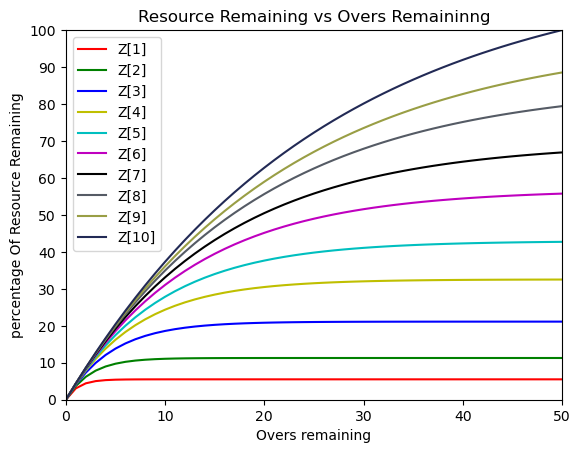

In [22]:
plotparam_resourceremainvsoverremains(optparameters)


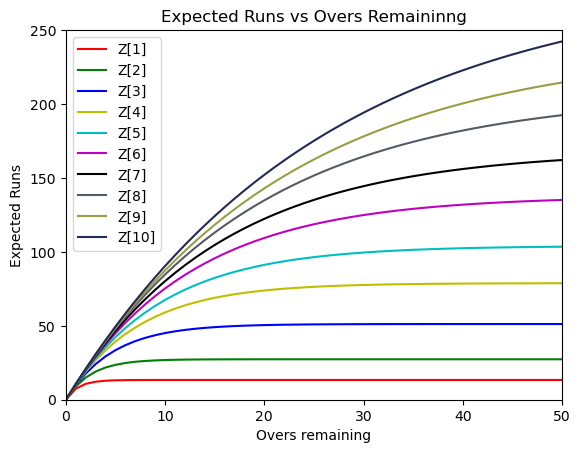

In [23]:
plotparam_expectedrunvsoverremains(optparameters)